# 1. Preprocessing Data

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

The below lists will hold the raw data

In [2]:
train_labels  = []
train_samples = []

### Generating Dummy Data

- An experimental Drug was tested on individuals from 13 to 100 years of age
- The trial had 2100 participants
    - Half of the participants were below 65 years of age
    
##### Outcome of Drug Trial
- 95% of patients 65 yrs or older experienced side effects from drug
- 95% of patients under 65 yrs did not experience side effects


Ultimately we want the model to tell uss whether or not a patient should experience side-effects,  given the patients age. 
The judgement will be based on training data

In [3]:
for i in range(50):
    
    #the 5% younger individuals who experienced side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    #the 5% older individuals who didn't experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    
    #the 95% younger individuals who did not experienced side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    #the 95% older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

- train_samples : age of 2100 individuals
- train_labels  : corresponding outcoms
     - 0 if no side effects shown
     - 1 if side effects shown

In [4]:
print('Age----Outcome')
for i in range(10):
    print(train_samples[i],'----',train_labels[i])

Age----Outcome
60 ---- 1
73 ---- 0
42 ---- 1
97 ---- 0
63 ---- 1
95 ---- 0
51 ---- 1
80 ---- 0
31 ---- 1
72 ---- 0


We better convert the data into a numpy array as API's take input in format of numpy array

In [5]:
train_labels  = np.array(train_labels)
train_samples = np.array(train_samples)

We will use Scikit Learn's MinMaxScaler to scale all the ages fro 13-100 in range of 0 to 1

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

We reshape data as a Technical Formality as fit_transform does not accept 1D data by default

### Scaled Data

In [7]:
print('Age(scaled)    Outcome')
for i in range(10):
    print(scaled_train_samples[i],'----',train_labels[i])

Age(scaled)    Outcome
[0.54022989] ---- 1
[0.68965517] ---- 0
[0.33333333] ---- 1
[0.96551724] ---- 0
[0.57471264] ---- 1
[0.94252874] ---- 0
[0.43678161] ---- 1
[0.77011494] ---- 0
[0.20689655] ---- 1
[0.67816092] ---- 0


# 2. Creating an Artifitial Neural Network

### Importing Required Libraries

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense

Using TensorFlow backend.


### Creating Model

In [9]:
model = Sequential([Dense(units = 16,input_shape=(1,),activation='relu'),
                    Dense(units = 32 , activation = 'relu'),
                    Dense(units = 2  , activation = 'softmax')])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


- model is an instance of Sequential Object
- A Keras Sequential Model is a **linear stack of layers**.
- It accepts a list and each element in the list should be a layer

**We will be Using the Data we Generated Above**

- input_shape = (1,) it shows that for each training examples it expects a tuple of integers that matches the shape (1,)

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


- We are using Softmax activation for the last layer.
- None will actually be replaced by the no. of training Examples.

#### Compiling the Model

In [11]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

If we don't intend to add learning_rate we could simply go with
```python
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
```

- Optimizer     - Adam
- Learning_rate - 0.0001
- loss          - sparse_categorical_cross_entropy
- metrics       - Accuracy

#### Training the Model

In [12]:
model.fit(x=scaled_train_samples,y = train_labels,batch_size=10,epochs=20,shuffle=True)


Epoch 1/20
2100/2100 [==============================] - 0s 110us/step - loss: 0.6847 - accuracy: 0.5043
Epoch 2/20
2100/2100 [==============================] - 0s 71us/step - loss: 0.6622 - accuracy: 0.5986
Epoch 3/20
2100/2100 [==============================] - 0s 69us/step - loss: 0.6393 - accuracy: 0.6348
Epoch 4/20
2100/2100 [==============================] - 0s 70us/step - loss: 0.6114 - accuracy: 0.6895
Epoch 5/20
2100/2100 [==============================] - 0s 72us/step - loss: 0.5800 - accuracy: 0.7424
Epoch 6/20
2100/2100 [==============================] - 0s 70us/step - loss: 0.5423 - accuracy: 0.7967
Epoch 7/20
2100/2100 [==============================] - 0s 68us/step - loss: 0.5094 - accuracy: 0.8219
Epoch 8/20
2100/2100 [==============================] - 0s 62us/step - loss: 0.4784 - accuracy: 0.8457
Epoch 9/20
2100/2100 [==============================] - 0s 69us/step - loss: 0.4500 - accuracy: 0.8652
Epoch 10/20
2100/2100 [==============================] - 0s 71us/step -

- x  =  training_features of shape (m,input_shape)   here(2100,1)
- y  =  training_labels   of shape (m,1)             here(2100,1)
- batch_size ; we need to specify
- epochs
- shuffle = True (it;s better to shuffle our dataset for better prediction)
- verbose = 2 Specifies how much output to the console we want. It ranges from 0-2 so we're getting the most verbose
     - verbose = 0 ; no output
     - verbose = 1 ; all outputs along with training of all epochs (as loading bar) default
     - verbose = 2 ; only loss and accuracy

# 3. Creating A Validation Set

- It's better to choose a portion of training set and place it in a validation set(dev set)
- Then the Algorithm will not only see the loss and accuracy for training set during each epoch but also for validation set
- The Validation set accuracy tells us how much the model is genralizing on non trained data

In [13]:
model.fit(x = scaled_train_samples,y=train_labels,validation_split=(0.1),batch_size=10,epochs=20,shuffle=True,verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.3084 - accuracy: 0.9265 - val_loss: 0.2113 - val_accuracy: 0.9905
Epoch 2/20
 - 0s - loss: 0.3055 - accuracy: 0.9275 - val_loss: 0.2061 - val_accuracy: 0.9905
Epoch 3/20
 - 0s - loss: 0.3029 - accuracy: 0.9296 - val_loss: 0.1999 - val_accuracy: 0.9905
Epoch 4/20
 - 0s - loss: 0.3007 - accuracy: 0.9275 - val_loss: 0.1968 - val_accuracy: 0.9905
Epoch 5/20
 - 0s - loss: 0.2985 - accuracy: 0.9312 - val_loss: 0.1912 - val_accuracy: 0.9905
Epoch 6/20
 - 0s - loss: 0.2968 - accuracy: 0.9254 - val_loss: 0.1886 - val_accuracy: 0.9905
Epoch 7/20
 - 0s - loss: 0.2950 - accuracy: 0.9296 - val_loss: 0.1849 - val_accuracy: 0.9905
Epoch 8/20
 - 0s - loss: 0.2938 - accuracy: 0.9302 - val_loss: 0.1812 - val_accuracy: 0.9905
Epoch 9/20
 - 0s - loss: 0.2921 - accuracy: 0.9302 - val_loss: 0.1778 - val_accuracy: 0.9905
Epoch 10/20
 - 0s - loss: 0.2908 - accuracy: 0.9302 - val_loss: 0.1759 - val_accuracy: 0.9905
Epoch 11/20
 - 0s - lo

**Thus we can surely say that our model is not overfitting the training set**

# 4. Making Predictions

### CREATING A TEST SET

In [14]:
test_labels  = []
test_samples = []
for i in range(10):
    
    #the 5% younger individuals who experienced side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    #the 5% older individuals who didn't experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    
    #the 95% younger individuals who did not experienced side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    #the 95% older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels  = np.array(test_labels)
test_samples = np.array(test_samples)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

### PREDICTING

In [15]:
predictions = model.predict(x = scaled_test_samples,batch_size =10,verbose = 0)

To see what the predictions look like
```python
[probability that output=0 probability that output=1]
```

In [16]:
for i in range(10):
    print(predictions[i])

[0.5143032  0.48569682]
[0.3712358  0.62876415]
[0.85932195 0.14067805]
[0.04807662 0.95192343]
[0.9442332  0.05576685]
[0.02790662 0.9720934 ]
[0.91325295 0.08674703]
[0.08905273 0.91094726]
[0.9442332  0.05576685]
[0.03018125 0.9698187 ]


What if we like to get the classes , rather than probability

In [17]:
rounded_predictions = model.predict_classes(x = scaled_test_samples,batch_size=10,verbose=0)

In [18]:
for i in range(10):
    print(rounded_predictions[i])

0
1
0
1
0
1
0
1
0
1


# 5. Creating a confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [20]:
Conf_Mat = confusion_matrix(y_true = test_labels,y_pred = rounded_predictions)

In [21]:
print(Conf_Mat)

[[196  14]
 [ 10 200]]


**Plotting a Confusion Matrix**

Non-Normalized Confusion Matrix
[[196  14]
 [ 10 200]]


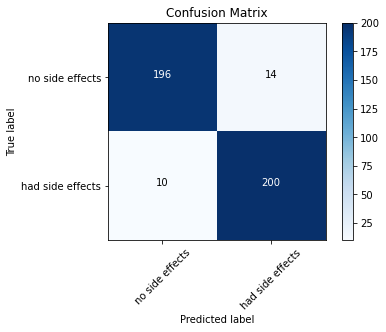

In [22]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion_Matrix',cmap = plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Non-Normalized Confusion Matrix')
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment = 'center',
                 color ='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ['no side effects','had side effects']
plot_confusion_matrix(Conf_Mat,cm_plot_labels,title='Confusion Matrix')

No Need To understand the code;  This is only for visualization

# 6. SAVING AND LOADING KERAS MODEL

**SAVING MODEL**

In [23]:
model.save('models\sample_model.h5')

**LOAD MODEL**

In [24]:
from keras.models import load_model
new_model = load_model('models\sample_model.h5')

In [25]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [26]:
new_model.get_weights()

[array([[-0.34687272,  0.30845928, -0.3969993 , -0.55214304, -0.254238  ,
         -0.01571646, -0.12906495, -0.4995945 ,  0.7594511 , -0.06320071,
          0.05709985, -0.3574348 ,  0.4437953 , -0.08498788,  0.6748649 ,
          0.7137057 ]], dtype=float32),
 array([ 0.        , -0.12202524,  0.        ,  0.        ,  0.        ,
         0.21410346,  0.        ,  0.        , -0.16646951,  0.        ,
         0.28890216,  0.        , -0.15318805,  0.        , -0.10981902,
        -0.1851406 ], dtype=float32),
 array([[-0.06673953, -0.20418209,  0.18660524, -0.32157195, -0.33403307,
          0.14769772,  0.02868193,  0.05865443,  0.20736596, -0.01938435,
          0.25312182,  0.1835449 ,  0.03315306, -0.31128523,  0.06927812,
         -0.07678843, -0.2784091 ,  0.22742185,  0.33352336, -0.17648984,
          0.27509937,  0.29734626,  0.32465997, -0.20539221,  0.04949102,
          0.30281046, -0.10646319,  0.30252913,  0.12003455,  0.19411305,
         -0.2651546 , -0.2784171 ],
 

In [27]:
new_model.optimizer

In [28]:
new_model.loss

'sparse_categorical_crossentropy'

## Saving and Loading Only the Architecture of the model

**SAVING**

In [29]:
json_string = new_model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "act

**LOADING**

In [30]:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [31]:
model_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_architecture.get_weights()

[array([[-0.13110942,  0.0085699 ,  0.1239354 , -0.09515139, -0.1820401 ,
         -0.4022593 ,  0.36903667,  0.09360141,  0.08736026, -0.317356  ,
         -0.32382703,  0.5236151 , -0.35098386,  0.12323189,  0.137469  ,
          0.17732751]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[ 2.62307554e-01,  1.94277078e-01,  1.80569917e-01,
          1.25467122e-01, -2.93858767e-01,  9.11292434e-02,
         -5.87364435e-02, -1.34905905e-01, -1.42448753e-01,
          1.00317329e-01,  9.82806087e-03,  1.68537050e-01,
          1.01944208e-01, -2.89865285e-01,  1.51156694e-01,
         -1.80504754e-01,  2.05088645e-01,  1.01770967e-01,
          1.33700013e-01, -4.98862863e-02, -5.93250990e-03,
         -2.49223590e-01,  6.41834140e-02,  1.65000945e-01,
         -3.39709073e-01,  2.02361614e-01,  1.95204288e-01,
         -1.18461475e-01,  1.54902130e-01, -2.92859495e-01,
         -1.56361938e-01,  3.18429381e-01]

**Randomly Initialized Weights**

## Saving and Loading only Weights of the Model

**SAVING**

In [33]:
model.save_weights('models\sample_model_weights.h5')

Create a New Model

In [34]:
model2 = Sequential([Dense(units = 16,input_shape=(1,),activation='relu'),
                    Dense(units = 32 , activation = 'relu'),
                    Dense(units = 2  , activation = 'softmax')])
model2.get_weights()

[array([[ 0.34707612,  0.52167404, -0.32849258, -0.08935243, -0.22649777,
          0.2652259 , -0.10639688, -0.515274  ,  0.45806122, -0.26650986,
         -0.35966268, -0.06603295, -0.538849  ,  0.50924075,  0.57557666,
         -0.56731135]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[-7.40865767e-02,  3.53431076e-01, -2.40964741e-01,
          1.15026325e-01, -1.86121240e-01,  2.47474223e-01,
          1.01707757e-01, -2.70058870e-01,  7.86955059e-02,
         -1.36306524e-01,  2.72623032e-01, -2.12802812e-01,
          1.33836567e-01,  4.45987880e-02, -2.02320039e-01,
          1.76316947e-01, -2.91654170e-01, -1.69571266e-01,
          1.48599595e-01,  4.05868292e-02,  1.85098052e-02,
         -1.33728236e-01, -1.76123589e-01,  2.50255913e-01,
          2.06741065e-01, -7.63506889e-02,  2.20138997e-01,
         -2.29567647e-01,  8.47482979e-02,  7.60348439e-02,
         -3.17201644e-01, -9.70552564e-02]

**We can surely see that before loading weights we just had only randomly initialized weights**

In [35]:
model2.load_weights('models\sample_model_weights.h5')

In [36]:
model2.get_weights()

[array([[-0.34687272,  0.30845928, -0.3969993 , -0.55214304, -0.254238  ,
         -0.01571646, -0.12906495, -0.4995945 ,  0.7594511 , -0.06320071,
          0.05709985, -0.3574348 ,  0.4437953 , -0.08498788,  0.6748649 ,
          0.7137057 ]], dtype=float32),
 array([ 0.        , -0.12202524,  0.        ,  0.        ,  0.        ,
         0.21410346,  0.        ,  0.        , -0.16646951,  0.        ,
         0.28890216,  0.        , -0.15318805,  0.        , -0.10981902,
        -0.1851406 ], dtype=float32),
 array([[-0.06673953, -0.20418209,  0.18660524, -0.32157195, -0.33403307,
          0.14769772,  0.02868193,  0.05865443,  0.20736596, -0.01938435,
          0.25312182,  0.1835449 ,  0.03315306, -0.31128523,  0.06927812,
         -0.07678843, -0.2784091 ,  0.22742185,  0.33352336, -0.17648984,
          0.27509937,  0.29734626,  0.32465997, -0.20539221,  0.04949102,
          0.30281046, -0.10646319,  0.30252913,  0.12003455,  0.19411305,
         -0.2651546 , -0.2784171 ],
 

In [37]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
